### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Loading the Dataset

In [2]:
# Provide the path to your dataset
file_path = "./data/zomato_df_final_data.csv"

# Load the dataset
zomato_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(zomato_df.head())

                                             address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmo

# Part A –Importing and Understanding Data
# Question 1

C:\Users\bbhat\AppData\Local\Temp\ipykernel_28036\1950702152.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette="magma")


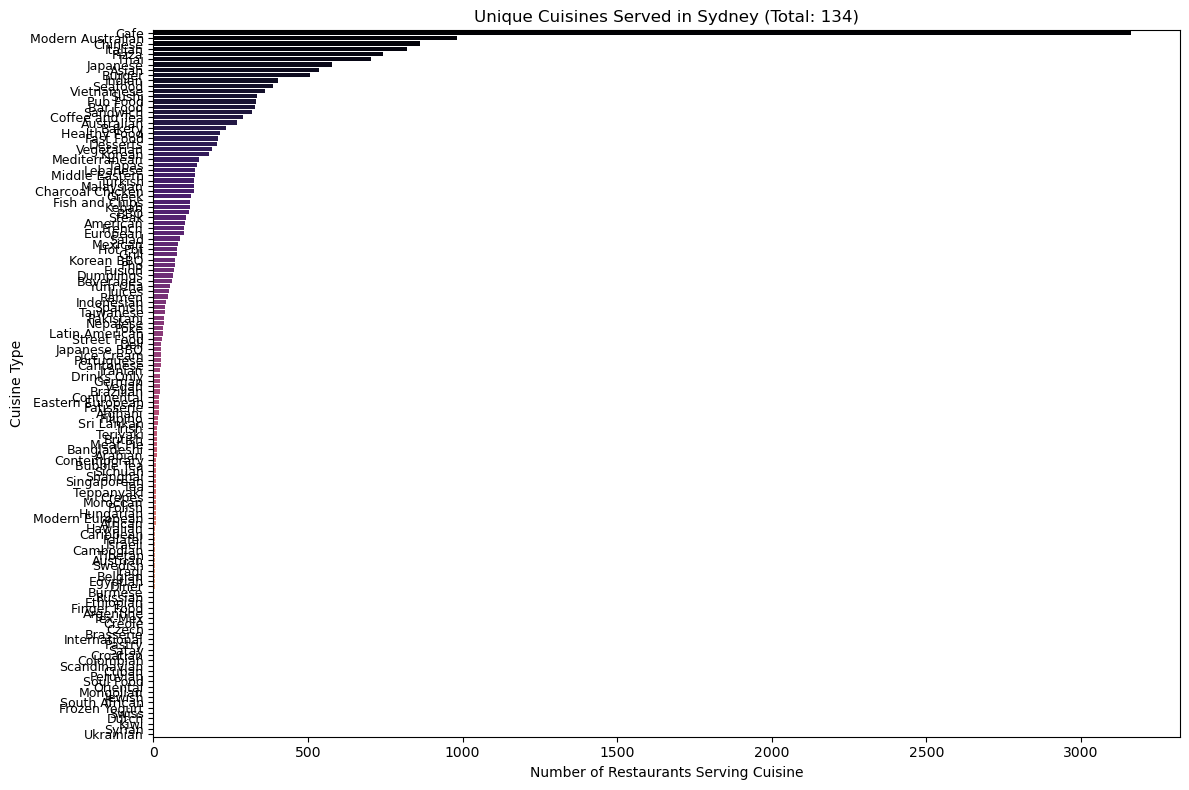

In [3]:
# Extract the 'cuisine' column and count unique cuisines
zomato_df['cuisine'] = zomato_df['cuisine'].apply(lambda x: eval(x))  # Convert string list to actual list
unique_cuisines = zomato_df['cuisine'].explode().nunique()

# Plot the count of unique cuisines
cuisine_counts = zomato_df['cuisine'].explode().value_counts()

# Modify the plot to make it more informative
plt.figure(figsize=(12,8))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, palette="magma")
plt.title(f"Unique Cuisines Served in Sydney (Total: {unique_cuisines})")
plt.xlabel("Number of Restaurants Serving Cuisine")
plt.ylabel("Cuisine Type")
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=9)
plt.tight_layout()

# Display the plot
plt.show()


The graph illustrates the distribution of various cuisines served by restaurants in Sydney. It reveals a highly diverse food scene, with **Café** and **Casual Dining** being the most popular types, each served by over 3000 restaurants. Other popular cuisines include **Modern Australian**, **Japanese**, and **Italian**, which are served by a significant number of restaurants. As the graph progresses, less common cuisines such as **Middle Eastern**, **Sri Lankan**, and **Ukrainian** show up with far fewer restaurant offerings, suggesting niche markets. This trend highlights both the variety and concentration of specific food preferences within Sydney's culinary landscape.

##### Because above graph is not good visiable so just taking top 30 Unique Cusines Served in Sydney

C:\Users\bbhat\AppData\Local\Temp\ipykernel_28036\2374342253.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30_cuisines.values, y=top_30_cuisines.index, palette="magma")


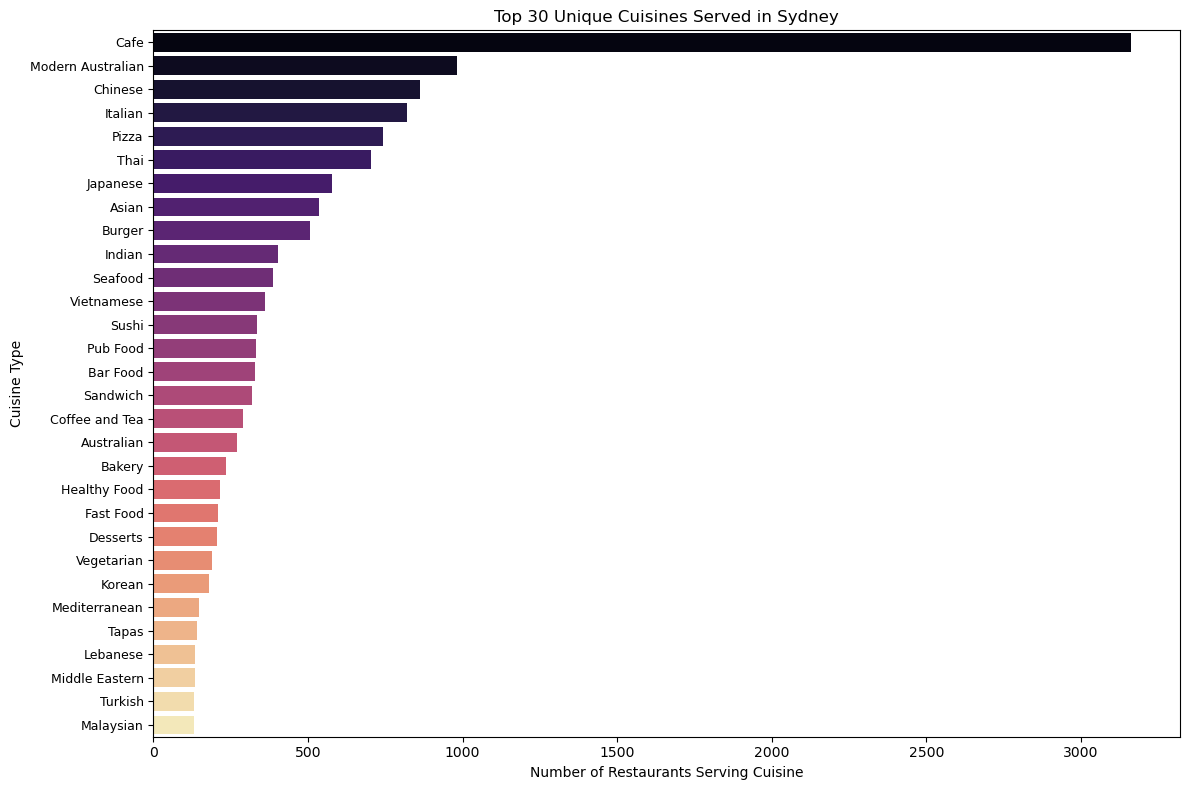

In [4]:
# Take the top 30 cuisines based on the number of restaurants serving them
top_30_cuisines = cuisine_counts.head(30)

# Plot the top 30 cuisines
plt.figure(figsize=(12,8))
sns.barplot(x=top_30_cuisines.values, y=top_30_cuisines.index, palette="magma")
plt.title("Top 30 Unique Cuisines Served in Sydney")
plt.xlabel("Number of Restaurants Serving Cuisine")
plt.ylabel("Cuisine Type")
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=9)
plt.tight_layout()

# Display the plot
plt.show()


The graph displays the **Top 30 Unique Cuisines Served in Sydney**, with **Café** leading as the most prevalent cuisine type, followed by **Modern Australian** and **Chinese**. Other popular cuisines such as **Italian**, **Pizza**, and **Thai** also feature prominently. The diversity of cuisine types demonstrates the cosmopolitan nature of Sydney’s food scene, catering to a wide range of culinary preferences. Additionally, less common cuisines like **Lebanese**, **Middle Eastern**, and **Malaysian** are also represented, indicating niche markets within the city. This analysis helps identify both mainstream and specialized food offerings in Sydney's restaurant industry.

C:\Users\bbhat\AppData\Local\Temp\ipykernel_28036\1617463490.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_suburbs.index, y=top_suburbs.values, palette="Blues_r")


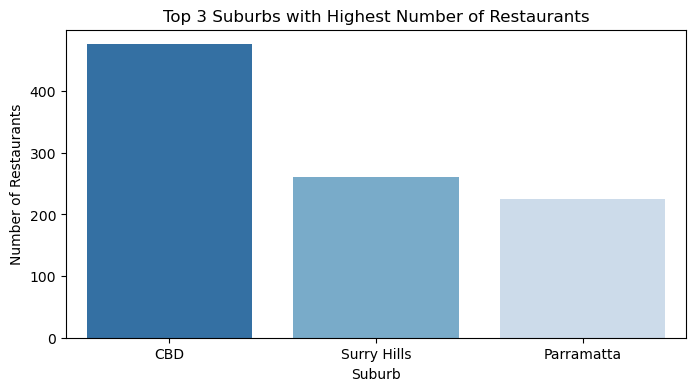

In [5]:
#Top 3 Suburbs with the Highest Number of Restaurants
# Count the number of restaurants per suburb
top_suburbs = zomato_df['subzone'].value_counts().head(3)

# Plot the top 3 suburbs
plt.figure(figsize=(8,4))
sns.barplot(x=top_suburbs.index, y=top_suburbs.values, palette="Blues_r")
plt.title("Top 3 Suburbs with Highest Number of Restaurants")
plt.xlabel("Suburb")
plt.ylabel("Number of Restaurants")
plt.show()


This graph shows the **Top 3 Suburbs with the Highest Number of Restaurants** in Sydney. The **CBD** has the largest concentration of restaurants, followed by **Surry Hills** and **Parramatta**. The higher density of restaurants in the CBD reflects its role as a central business and tourism hub, where foot traffic and demand for dining options are high. **Surry Hills** is known for its diverse food scene, while **Parramatta** is a growing suburban center with increasing culinary offerings. These insights can help restaurant owners target popular areas for new ventures or understand the competitive landscape.

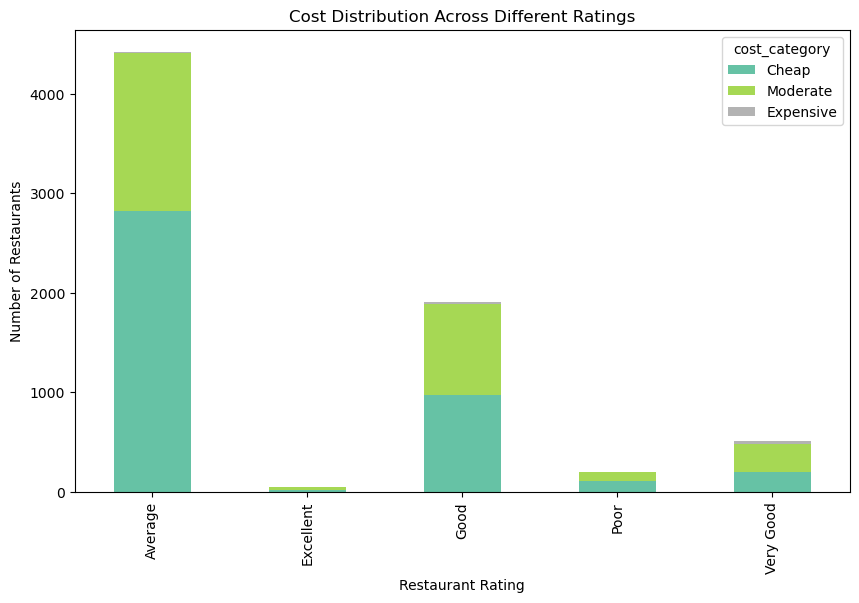

              count        mean         std   min   25%   50%    75%    max
rating_text                                                                
Average      4420.0   51.021267   22.831674  10.0  35.0  45.0   60.0  200.0
Excellent      51.0  101.666667  113.215134  20.0  40.0  60.0  120.0  500.0
Good         1903.0   59.528114   29.533156  10.0  40.0  50.0   70.0  370.0
Poor          201.0   55.845771   23.738810  20.0  40.0  50.0   70.0  180.0
Very Good     506.0   71.515810   44.030286  15.0  45.0  60.0   80.0  300.0


In [6]:
#Relation Between Ratings and Cost
# Filter data for relevant columns
rating_vs_cost = zomato_df[['cost', 'rating_text']].dropna()

# Create categories for cost (cheap, moderate, expensive)
rating_vs_cost['cost_category'] = pd.cut(rating_vs_cost['cost'], 
                                         bins=[0, 50, 150, float('inf')], 
                                         labels=['Cheap', 'Moderate', 'Expensive'])

# Create a stacked bar chart showing cost distribution for different ratings
cost_rating_crosstab = pd.crosstab(rating_vs_cost['rating_text'], rating_vs_cost['cost_category'])

cost_rating_crosstab.plot(kind='bar', stacked=True, figsize=(10,6), colormap="Set2")
plt.title("Cost Distribution Across Different Ratings")
plt.xlabel("Restaurant Rating")
plt.ylabel("Number of Restaurants")
plt.show()

# Analyze the relationship
rating_cost_summary = rating_vs_cost.groupby('rating_text')['cost'].describe()
print(rating_cost_summary)


This graph illustrates the **Cost Distribution Across Different Ratings** for restaurants in Sydney. 

Key insights include:
- **Average-rated restaurants** have the highest number, and most fall within the **moderate cost category**, followed by **cheap** options. Few are **expensive**.
- **Good-rated restaurants** show a more even distribution between **cheap** and **moderate** costs, with some expensive options present.
- **Very Good** and **Excellent-rated restaurants** tend to be either **moderate** or **expensive**, suggesting that higher ratings are often correlated with higher prices.
- **Poor-rated restaurants** are mostly **cheap**, aligning with the expectation that lower-quality restaurants charge less.

This supports the notion that higher-rated restaurants generally charge more, while lower-rated establishments are typically cheaper.

# Part A –Importing and Understanding Data
# Question 2

## Exploratory Data Analysis on 'Cost'
#### Histogram and Descriptive Statistics for Cost

Cost Summary:
 count    10154.000000
mean        51.153240
std         27.799485
min          8.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        500.000000
Name: cost, dtype: float64


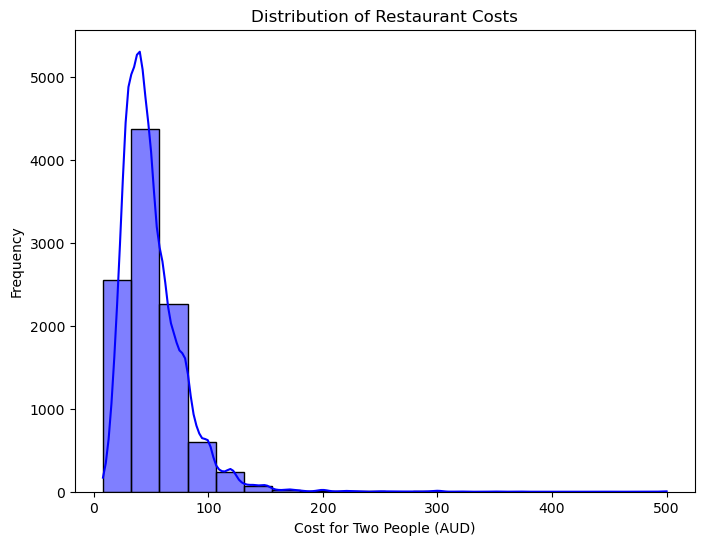

In [7]:
# Descriptive statistics for cost
cost_summary = zomato_df['cost'].describe()
print("Cost Summary:\n", cost_summary)

# Histogram for cost
plt.figure(figsize=(8,6))
sns.histplot(zomato_df['cost'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of Restaurant Costs')
plt.xlabel('Cost for Two People (AUD)')
plt.ylabel('Frequency')
plt.show()


This graph shows the **Distribution of Restaurant Costs** for two people in Sydney. The data is right-skewed, with most restaurants charging between **$20 and $100 AUD** for a meal for two. A small number of restaurants charge significantly higher prices, but they are rare, with the tail of the distribution extending up to **$500 AUD**. This suggests that Sydney's restaurant scene is predominantly mid-range in terms of pricing, catering primarily to moderately priced dining experiences, while high-end restaurants make up a smaller portion of the market.

## Exploratory Data Analysis on 'Rating'
#### Distribution Plot and Descriptive Statistics for Rating

Rating Summary:
 count    7184.000000
mean        3.283672
std         0.454580
min         1.800000
25%         3.000000
50%         3.300000
75%         3.600000
max         4.900000
Name: rating_number, dtype: float64


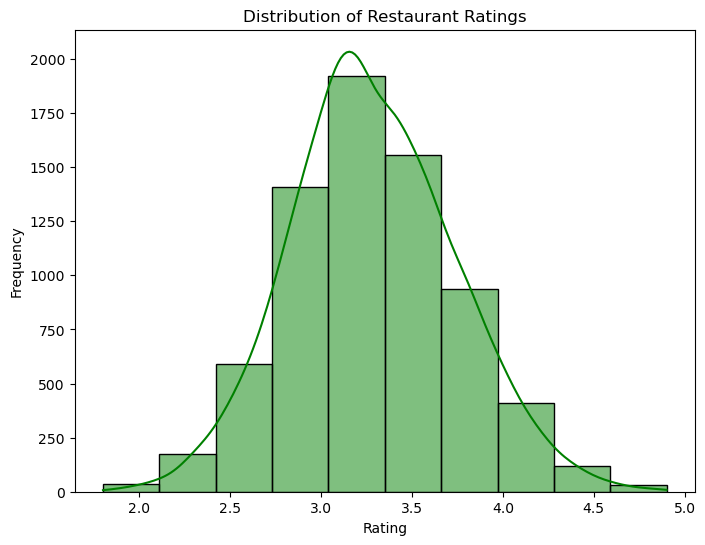

In [8]:
# Descriptive statistics for rating
rating_summary = zomato_df['rating_number'].describe()
print("Rating Summary:\n", rating_summary)

# Distribution plot for rating
plt.figure(figsize=(8,6))
sns.histplot(zomato_df['rating_number'].dropna(), bins=10, kde=True, color='green')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


This graph illustrates the **Distribution of Restaurant Ratings** in Sydney. The distribution is approximately bell-shaped and centered around a rating of **3.0**, indicating that a significant number of restaurants receive average ratings. The frequency of ratings decreases as you move away from the center, with fewer restaurants rated below **2.5** or above **4.0**. This suggests a concentration of mid-range quality establishments, with fewer restaurants achieving high ratings. The spread of ratings indicates that while there are many average restaurants, there is also a healthy mix of higher-rated venues, reflecting a competitive dining environment.

# Exploratory Data Analysis on 'Type'
#### Bar Plot for Business Type
Since 'Type' is a categorical variable, We can visualize its distribution using a bar plot:

C:\Users\bbhat\AppData\Local\Temp\ipykernel_28036\21954656.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.values, y=type_counts.index, palette='coolwarm')


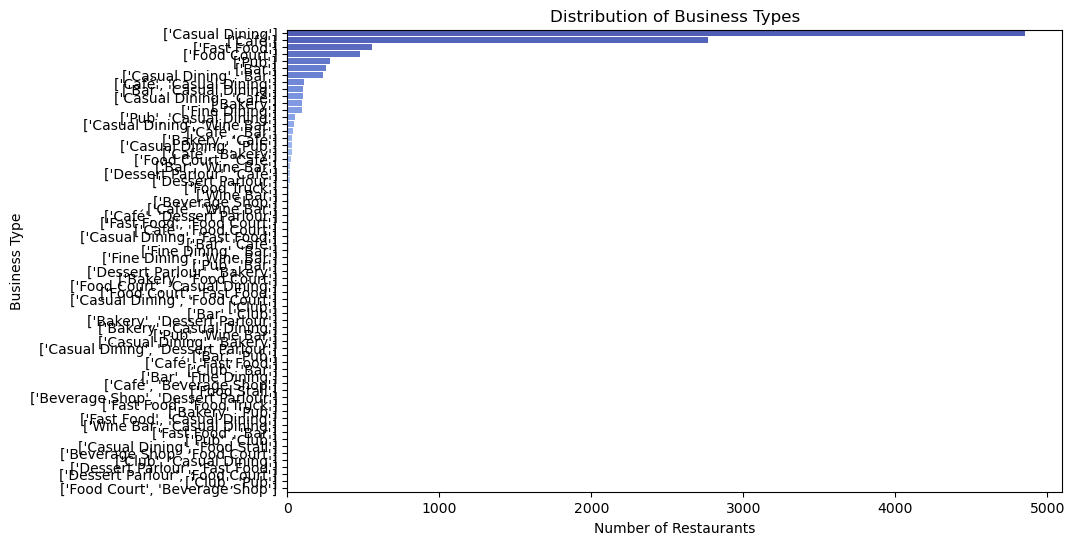

In [9]:
# Extract the types of business
type_counts = zomato_df['type'].explode().value_counts()

# Bar plot for business type
plt.figure(figsize=(10,6))
sns.barplot(x=type_counts.values, y=type_counts.index, palette='coolwarm')
plt.title('Distribution of Business Types')
plt.xlabel('Number of Restaurants')
plt.ylabel('Business Type')
plt.show()


The graph shows the **Distribution of Business Types** in Sydney's restaurant scene. 

### Key Insights:
- The **Casual Dining** category is the most prevalent, with nearly **5000 restaurants**, highlighting its popularity among diners.
- Other common types, such as **Fast Food** and **Café**, also have significant representation, indicating a strong demand for quick and casual dining options.
- The long tail of the distribution suggests a wide variety of less common business types, including niche markets like **Fine Dining** and **Dessert Parlour**. 
- The stark difference in the number of restaurants across categories suggests that while some types are highly favored, many other dining concepts exist, indicating a diverse culinary landscape in Sydney. 

These insights can assist stakeholders in identifying market trends and areas for potential investment or expansion.

### Graph is not informative so have split Type Data 

In [10]:
# Let's ensure we remove all instances of brackets [] properly and clean the data as requested.

# Remove brackets [] and quotes, and split the 'type' column
zomato_type_cleaned = zomato_df['type'].explode().str.replace(r'[\[\]\']', '', regex=True).str.split(', ')

# Explode the list into individual entries and strip any remaining leading/trailing spaces
zomato_type_cleaned = zomato_type_cleaned.explode().str.strip()

# Count occurrences of each type after cleaning
final_cleaned_type_counts = zomato_type_cleaned.value_counts()

# Display the cleaned and final counts
final_cleaned_type_counts.head(20)  # Show the top counts after the full cleanup


type
Casual Dining      5566
Café               3169
Bar                 692
Fast Food           588
Food Court          543
Pub                 382
Bakery              174
Fine Dining         113
Wine Bar            106
Dessert Parlour      67
Beverage Shop        17
Food Truck           16
Club                 12
Food Stall            2
Name: count, dtype: int64

C:\Users\bbhat\AppData\Local\Temp\ipykernel_28036\2701379093.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_cleaned_type_counts.values, y=final_cleaned_type_counts.index, palette="viridis")


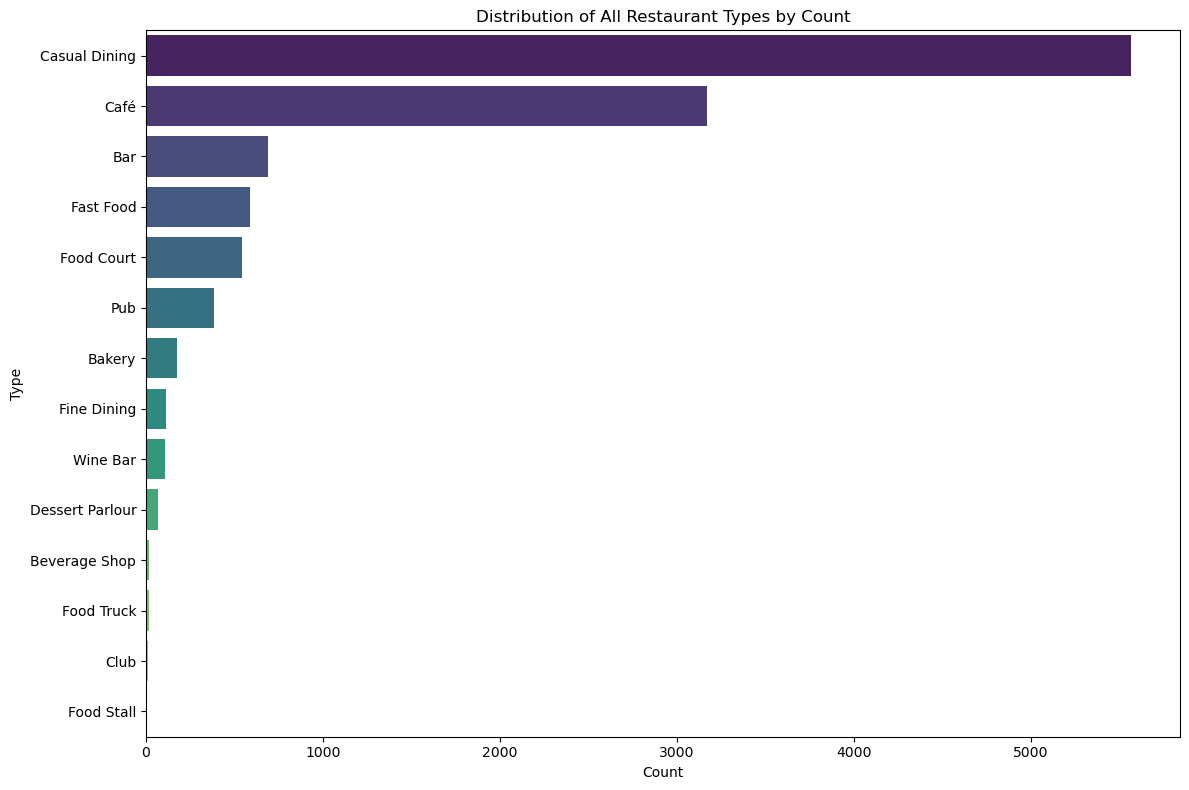

count      14.000000
mean      817.642857
std      1592.970211
min         2.000000
25%        29.500000
50%       143.500000
75%       576.750000
max      5566.000000
Name: count, dtype: float64

In [11]:
# Now let's perform the exploratory analysis for all the restaurant types, not just the top 20.

# Plot the distribution of all restaurant types
plt.figure(figsize=(12,8))
sns.barplot(x=final_cleaned_type_counts.values, y=final_cleaned_type_counts.index, palette="viridis")
plt.title("Distribution of All Restaurant Types by Count")
plt.xlabel("Count")
plt.ylabel("Type")
plt.tight_layout()
plt.show()

# Descriptive statistics for all restaurant types
type_stats_all = final_cleaned_type_counts.describe()

# Display descriptive statistics for all restaurant types
type_stats_all


The graph displays the **Distribution of All Restaurant Types by Count** in Sydney. 

### Key Insights:
- **Casual Dining** is the most prevalent category, with nearly **5000 establishments**, indicating a strong consumer preference for informal dining experiences.
- Following closely is the **Café** category, which also enjoys significant popularity, reflecting the café culture in Sydney.
- Other notable categories like **Fast Food**, **Bar**, and **Food Court** highlight the demand for quick and convenient dining options.
- The presence of a diverse range of restaurant types, including **Fine Dining**, **Beverage Shops**, and **Food Trucks**, indicates a varied culinary landscape catering to different tastes and preferences.

These insights emphasize the competitive nature of the restaurant industry in Sydney, where casual and café dining are particularly favored. If you need any further analysis or adjustments, feel free to ask!

### 3. Produce Cuisine Density Map

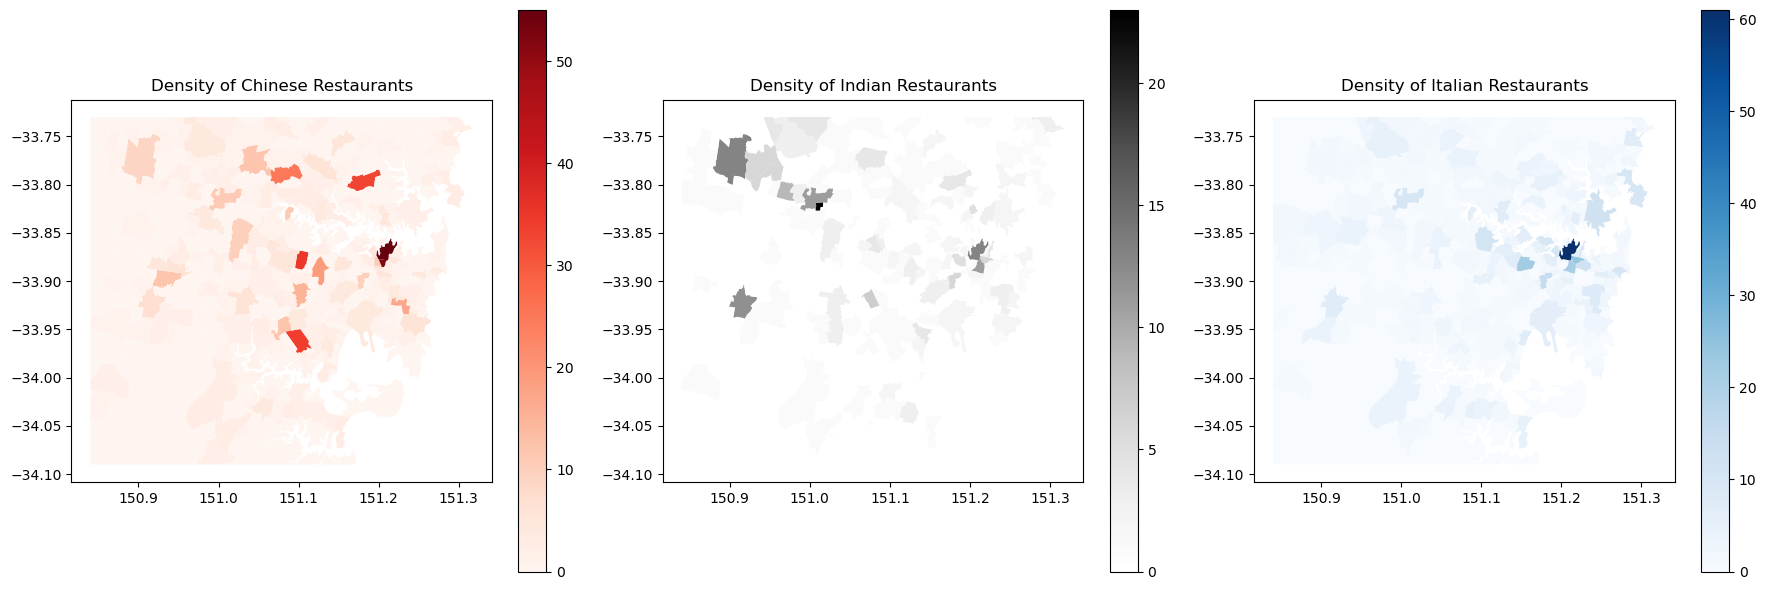

In [20]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the Sydney suburbs GeoJSON file
geojson_file_path = './data/sydney.geojson'
sydney_suburbs = gpd.read_file(geojson_file_path)

# Load the Zomato dataset (replace with the correct path to your CSV)
zomato_df = pd.read_csv('./data/zomato_df_final_data.csv')

# Create a GeoDataFrame for the Zomato data using latitude and longitude
zomato_geo = gpd.GeoDataFrame(zomato_df, geometry=gpd.points_from_xy(zomato_df.lng, zomato_df.lat), crs="EPSG:4326")

# Perform a spatial join to assign each restaurant to the corresponding suburb
restaurants_in_suburbs = gpd.sjoin(zomato_geo, sydney_suburbs, how="inner", predicate="within")

# Clean the 'cuisine' column by removing unnecessary characters
restaurants_in_suburbs['cuisine'] = restaurants_in_suburbs['cuisine'].str.strip("[]").str.replace("'", "")

# Function to count restaurants for a given cuisine type
def count_restaurants_by_cuisine(cuisine_type):
    filtered_restaurants = restaurants_in_suburbs[restaurants_in_suburbs['cuisine'].str.contains(cuisine_type, case=False)]
    cuisine_density = filtered_restaurants.groupby('SSC_NAME').size().reset_index(name=f'{cuisine_type}_count')
    return cuisine_density

# Count restaurants for Chinese, Indian, and Italian cuisines
chinese_density = count_restaurants_by_cuisine('Chinese')
indian_density = count_restaurants_by_cuisine('Indian')
italian_density = count_restaurants_by_cuisine('Italian')

# Merge the counts with the suburb GeoDataFrame
sydney_suburbs = sydney_suburbs.merge(chinese_density, how="left", on="SSC_NAME")
sydney_suburbs = sydney_suburbs.merge(indian_density, how="left", on="SSC_NAME")
sydney_suburbs = sydney_suburbs.merge(italian_density, how="left", on="SSC_NAME")

# Fill NaN values with 0 (suburbs without restaurants for that cuisine)
sydney_suburbs['Chinese_count'] = sydney_suburbs['Chinese_count'].fillna(0)
sydney_suburbs['Indian_count'] = sydney_suburbs['Indian_count'].fillna(0)
sydney_suburbs['Italian_count'] = sydney_suburbs['Italian_count'].fillna(0)

# Plot the maps for each cuisine
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Chinese cuisine density map
sydney_suburbs.plot(column='Chinese_count', ax=axes[0], legend=True, cmap='Reds')
axes[0].set_title('Density of Chinese Restaurants')

# Indian cuisine density map
sydney_suburbs.plot(column='Indian_count', ax=axes[1], legend=True, cmap='Greys')
axes[1].set_title('Density of Indian Restaurants')

# Italian cuisine density map
sydney_suburbs.plot(column='Italian_count', ax=axes[2], legend=True, cmap='Blues')
axes[2].set_title('Density of Italian Restaurants')

plt.tight_layout()
plt.show()


The series of maps illustrates the **density of different restaurant types** in Sydney, specifically for **Chinese**, **Indian**, and **Italian** cuisines.

### Key Insights:
- **Chinese Restaurants**: The density map shows significant clusters, particularly in suburban areas with a high concentration of Chinese restaurants, indicating a robust demand for this cuisine.
- **Indian Restaurants**: The density appears more dispersed, with fewer hotspots, suggesting that while there are Indian dining options available, they are not as prevalent as Chinese restaurants in Sydney.
- **Italian Restaurants**: The map indicates a moderate concentration, particularly in central areas, reflecting the popularity of Italian cuisine among diners.

These insights highlight not only the culinary preferences of the Sydney population but also potential market opportunities for expanding less represented cuisines like Indian dining. If you need further analysis or specific conclusions, let me know!

In [27]:
# Group by rating_number and aggregate votes using mean, max, and min
rating_votes = zomato_df.groupby("rating_number")["votes"].agg(["max", "median", "min"])

# Check the structure of the new dataset
rating_votes.head()


,max,median,min
rating_number,,,
1.8,104.0,68.0,32.0
1.9,142.0,57.0,42.0
2.0,138.0,71.0,22.0
2.1,286.0,37.0,14.0
2.2,340.0,43.0,16.0


In [31]:
import plotly.graph_objs as go

# Create the plotly figure
fig = go.Figure()

# Add shaded areas between min and max to show the range
fig.add_trace(
    go.Scatter(
        x=rating_votes.index, y=rating_votes["max"],
        mode="lines", line=dict(width=0),
        showlegend=False, hoverinfo='skip'
    )
)
fig.add_trace(
    go.Scatter(
        x=rating_votes.index, y=rating_votes["min"],
        fill='tonexty', fillcolor='rgba(173, 216, 230, 0.3)',  # Shaded area between min and max
        mode="lines", line=dict(width=0),
        name="Range (Min-Max)", hoverinfo='skip'
    )
)

# Add the max votes line
fig.add_trace(
    go.Scatter(
        x=rating_votes.index, y=rating_votes["max"],
        mode="lines+markers", name="Max Votes",
        line=dict(color='royalblue', width=3, shape='spline'),
        marker=dict(size=8, color='royalblue'),
        hovertemplate="<b>Rating: %{x}</b><br>Max Votes: %{y}<extra></extra>"
    )
)

# Add the median votes line
fig.add_trace(
    go.Scatter(
        x=rating_votes.index, y=rating_votes["median"],
        mode="lines+markers", name="Median Votes",
        line=dict(color='darkorange', width=3, shape='spline'),
        marker=dict(size=8, color='darkorange'),
        hovertemplate="<b>Rating: %{x}</b><br>Median Votes: %{y}<extra></extra>"
    )
)

# Add the min votes line
fig.add_trace(
    go.Scatter(
        x=rating_votes.index, y=rating_votes["min"],
        mode="lines+markers", name="Min Votes",
        line=dict(color='green', width=3, shape='spline'),
        marker=dict(size=8, color='green'),
        hovertemplate="<b>Rating: %{x}</b><br>Min Votes: %{y}<extra></extra>"
    )
)

# Add annotations to highlight key points
fig.add_annotation(
    x=rating_votes["max"].idxmax(), y=rating_votes["max"].max(),
    text=f"Highest Votes: {rating_votes['max'].max()}",
    showarrow=True, arrowhead=2, ax=0, ay=-50, font=dict(color='royalblue', size=12)
)
fig.add_annotation(
    x=rating_votes["min"].idxmin(), y=rating_votes["min"].min(),
    text=f"Lowest Votes: {rating_votes['min'].min()}",
    showarrow=True, arrowhead=2, ax=0, ay=50, font=dict(color='green', size=12)
)

# Update the layout to make the graph wider and taller
fig.update_layout(
    title="<b>Votes vs Rating Number</b>",
    title_font_size=24,
    xaxis_title="<b>Rating Number</b>",
    yaxis_title="<b>Number of Votes</b>",
    template="plotly_white",
    plot_bgcolor='rgba(245, 245, 245, 1)',  # Light grey background
    hovermode="x unified",
    font=dict(size=16),
    xaxis=dict(
        showgrid=True, gridcolor='lightgrey',
        tickmode='linear', dtick=0.1,
        title_standoff=10
    ),
    yaxis=dict(
        showgrid=True, gridcolor='lightgrey',
        title_standoff=10
    ),
    legend=dict(
        title="<b>Legend</b>",
        font=dict(size=14),
        bordercolor="Black",
        borderwidth=1
    ),
    # Set the figure size (width and height)
    width=1200,  # Increased width
    height=600   # Adjust height if needed
)

# Show the interactive plot
fig.show()


### Explanation of the Plot:

The plot visualizes the relationship between restaurant `Rating Number` and the `Number of Votes` received. It displays the maximum (blue), median (orange), and minimum (green) votes for different rating numbers. A shaded area between the minimum and maximum values highlights the range of votes across rating numbers. The highest number of votes is 3,236 at a rating number of 4.6, while the lowest vote count is 4 at a rating of 1.7. This visualization helps identify how ratings correlate with customer engagement, with higher ratings generally attracting more votes.


### Limitations of Non-Interactive Plots with Explanations:

1. **Lack of Exploration Capabilities**:
   Non-interactive plots are static, meaning users cannot zoom into specific areas of interest or pan through dense sections of the graph. This can be limiting when dealing with datasets that have outliers or dense clusters, as users are forced to view all data points in one frame, making it hard to focus on specific details.

2. **Overcrowding of Information**:
   When plotting multiple metrics (e.g., max, median, min votes), non-interactive plots can become cluttered and difficult to interpret. Without the ability to toggle or filter different data series, all data is presented at once, which can overwhelm viewers and obscure critical insights. Interactive plots allow users to selectively hide or show data series, improving clarity.

3. **No Real-Time Feedback**:
   Static plots do not provide real-time feedback or detailed information on individual data points. Users cannot hover over specific points to get precise values or additional metadata, making it challenging to understand the significance of individual points without overwhelming the plot with text labels.

4. **Fixed Layout and Size**:
   Non-interactive plots have a fixed layout and size, meaning they cannot be resized dynamically based on user needs. This limitation can make it hard to see details when the plot is printed or viewed on different devices. Interactive plots, on the other hand, can be adjusted, zoomed, and resized dynamically to fit different resolutions and screen sizes.

5. **Limited User Engagement**:
   Non-interactive plots do not engage users because they are static and unresponsive. Users cannot interact with the data or customize their view, limiting the depth of their analysis. With interactive libraries, users can explore the data in a more engaging manner, such as by zooming, filtering, or adding annotations, allowing for a more in-depth and personalized exploration of insights. 

These limitations highlight how static visualizations are less effective when dealing with complex datasets, making interactive tools a superior option for deep analysis.
